<a href="https://colab.research.google.com/github/kangdoung/CS114.K21/blob/master/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab.patches import cv2_imshow
import cv2
import os

def download_view(img_url):
  img_file = os.path.basename(img_url)
  !curl -o $img_file $img_url
  img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  return img_file

https://www.kimballstock.com/pix/DOK/01/DOK_01_KH0001_01_P.JPG
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65270  100 65270    0     0   152k      0 --:--:-- --:--:-- --:--:--  152k


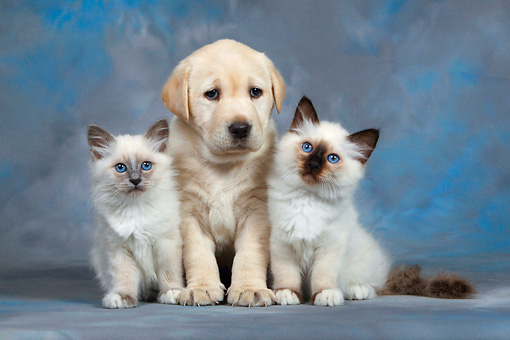

DOK_01_KH0001_01_P.JPG


In [3]:
#@title Nhập URL

img_url = "https://www.kimballstock.com/pix/DOK/01/DOK_01_KH0001_01_P.JPG" #@param {type:"string"}

print(img_url)
img_file = download_view(img_url)
print(img_file)

In [8]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = img_file
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])


RuntimeError: ignored

In [5]:
!sudo apt install tesseract-ocr
!pip install pytesseract 
#!pip install opencv-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,040 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [0]:
import pytesseract
import shutil
import os
import random
from PIL import Image

In [11]:
from google.colab import files
uploaded = files.upload()

Saving 1456539636-WP-20160227-001.jpg to 1456539636-WP-20160227-001.jpg


User uploaded file "1456539636-WP-20160227-001.jpg" with length 13246 bytes


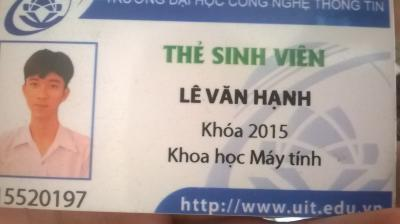

THE SINH VIEN :
LE VAN HANH


In [12]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  image_path_in_colab = fn
  img = cv2.imread(image_path_in_colab, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
  print(extractedInformation)

In [6]:
!pip install dlib
!pip install face_recognition

In [7]:
from google.colab import files
uploaded = files.upload()

Saving cac_nguoi_dep_hoa_hau_hoan_vu_viet_nam_1.jpg to cac_nguoi_dep_hoa_hau_hoan_vu_viet_nam_1 (1).jpg


User uploaded file "cac_nguoi_dep_hoa_hau_hoan_vu_viet_nam_1.jpg" with length 119592 bytes


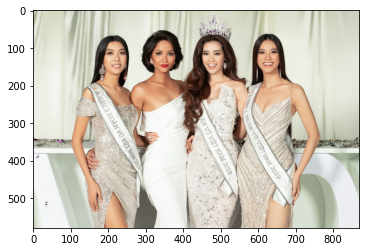

Found 4 face(s) in this photograph.
A face is located at pixel location Top: 101, Left: 446, Bottom: 163, Right: 508


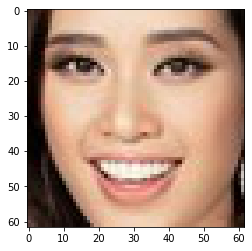

A face is located at pixel location Top: 88, Left: 312, Bottom: 163, Right: 386


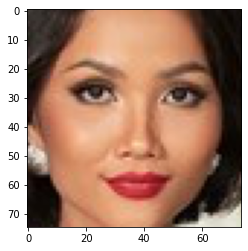

A face is located at pixel location Top: 94, Left: 591, Bottom: 156, Right: 653


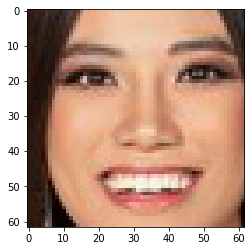

A face is located at pixel location Top: 101, Left: 190, Bottom: 163, Right: 252


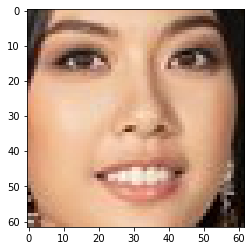

In [11]:
import face_recognition
import matplotlib.pyplot as plt
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

  image = face_recognition.load_image_file(fn)

  plt.imshow(image)
  plt.show()  
  
  face_locations = face_recognition.face_locations(image)

  print("Found {} face(s) in this photograph.".format(len(face_locations)))

  for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    plt.imshow(face_image)
    plt.show()